In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [2]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)




*   In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.
*   Date is also not useful because we already have season column which is also almost equal to date.


*   City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.
*   'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.





In [4]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [5]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [6]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [7]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [8]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [9]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [10]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64




*   Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.
*   Filling player_dismissed null values with 'No wicket', dismissal_Kind null values with also No Wicket.



In [11]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [12]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000




*   I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.
*   In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.


*   And in remaining columns max value is in certain limit only. So i can say there are not much outliers.






### Q1)Who will win today match MI vs DC?

In [13]:
#First Lets see head-head results
df_DC_MI = df_matches[((df_matches['team1'] == 'Delhi Capitals') | (df_matches['team1'] == 'Mumbai Indians')) & 
                        ((df_matches['team2'] == 'Delhi Capitals') | (df_matches['team2'] == 'Mumbai Indians'))] 

#plotting DC and MI wins against each other
import plotly.graph_objs as go
df_winner = df_DC_MI[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by DC and MI against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

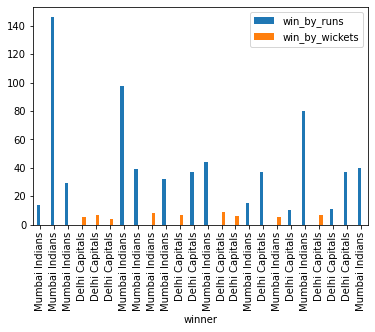

In [14]:
#Lets look at how each tean won the matches i.e weather batting first or bowling first
import matplotlib.pyplot as plt
df_DC_MI = df_DC_MI[['win_by_runs','win_by_wickets','winner']]
df_DC_MI.plot( "winner", kind="bar")

**Conclusion :-**



*   MI and DC played 24 matches against each othe. DC won 12 and MI won 12 matches.
*   DC won most of the matches when they are chasing and MI won most of the matches when they are defending targets.

So we can't choose any team by using above data, I am predicting DC will win today match because they are very good at chasing targets against MI, So in this year IPL last 20 matches 16 times team won while chasing targets.



### Q2) How many wickets totally will both the teams loose during powerplay?

In [15]:
df_DCMI_PP = df_deliveries[((df_deliveries['batting_team'] == 'Sunrisers Hyderabad') & (df_deliveries['bowling_team'] == 'Mumbai Indians') |
                           (df_deliveries['batting_team'] == 'Mumbai Indians') & (df_deliveries['bowling_team'] == 'Sunrisers Hyderabad')) &
                           (df_deliveries['over'] <= 6)] 

df_wickets = df_DCMI_PP[df_DCMI_PP['player_dismissed'] != 'No Wicket']
df_wickets = df_wickets.groupby('match_id',as_index=False)['player_dismissed'].count()
df_wickets.rename(columns={'player_dismissed':'Number_of_wickets'}, inplace=True)
df_wickets.head()

,match_id,Number_of_wickets
0,10,2
1,47,3
2,423,3
3,444,2
4,477,5


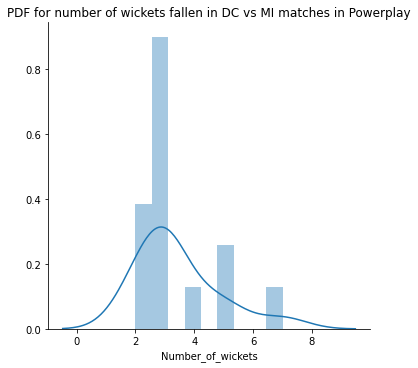

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
#Now plotting PDF of wickets in each match
sns.FacetGrid(df_wickets,size=5) \
   .map(sns.distplot, "Number_of_wickets") \
   .add_legend();

plt.title("PDF for number of wickets fallen in DC vs MI matches in Powerplay")
plt.show();

**Conclusion :-**



*   From above PDF plot i can say they lost 2-3 wickets in powerplay in most of the matches.
*   So i am predicting in today match also they will loose 2-3 wickets.



### Q3) How many bowlers will have economy rate less than 9 and gives fewer than 6 boundaries of which at most 2 of them only are 6s? Consider only bowler who bowls more than  over.

In [19]:
from functools import reduce
#Calculating economy rate of bowlers who are playing today anrich nortze, sams and pattinson data is not available.
df_bowlers = df_deliveries[(df_deliveries['bowler'] == 'K Rabada') | (df_deliveries['bowler'] == 'R Ashwin') |
                           (df_deliveries['bowler'] == 'MP Stoinis') | (df_deliveries['bowler'] == 'AR Patel') |
                           (df_deliveries['bowler'] == 'JJ Bumrah') | (df_deliveries['bowler'] == 'TA Boult') |
                           (df_deliveries['bowler'] == 'RD Chahar') | (df_deliveries['bowler'] == 'KH Pandya')]

runs_given = df_bowlers[(df_bowlers['legbye_runs'] == 0) & (df_bowlers['bye_runs'] == 0)]
df_runs_given = df_bowlers.groupby(['match_id','bowler'],as_index=False)['total_runs'].sum()
df_runs_given.rename(columns={'total_runs':'runs_given'},inplace=True)

balls_bowled = df_bowlers[(df_bowlers['wide_runs'] == 0) & (df_bowlers['noball_runs'] == 0)]
df_balls_bowled = balls_bowled.groupby(['match_id','bowler'],as_index=False)['ball'].count()
df_balls_bowled.rename(columns={'ball':'balls_bowled'},inplace=True)

#Now merging above 2 dataframes
df_all = [df_runs_given,df_balls_bowled]
df_economy_rate = reduce(lambda  left,right: pd.merge(left,right,on=['match_id','bowler'],how='outer'), df_all) 

df_economy_rate['economy_rate'] = (df_economy_rate['runs_given']/df_economy_rate['balls_bowled'])*6
df_economy_rate.head()

,match_id,bowler,runs_given,balls_bowled,economy_rate
0,2,JJ Bumrah,29,24,7.250000
1,2,KH Pandya,21,12,10.500000
2,3,TA Boult,41,24,10.250000
3,4,AR Patel,28,24,7.000000
4,4,MP Stoinis,28,18,9.333333


But in question clearly mentioned that we have to take only bowlers who bowled more than 1 over and and economy less than 9.

In [22]:
#First i am taking median of every bowler economy rate
df_economy_rate = df_economy_rate[df_economy_rate['balls_bowled'] > 6]
df_economy_rate.groupby('bowler',as_index = False)['economy_rate'].median()

,bowler,economy_rate
0,AR Patel,7.500000
1,JJ Bumrah,7.633333
2,K Rabada,8.450000
3,KH Pandya,7.250000
4,MP Stoinis,9.333333
5,R Ashwin,6.500000
6,RD Chahar,6.375000
7,TA Boult,9.000000


**Conclusion :-**



*   From above economy rate boult and stoinis has economy greater than 9.  In t20 cricket atleast 10 bowlers has to bowl minimum 1 over. But we dont have data of all the bowlers who are playing today.
*   So according to above analysis 1 bowler from each team give away more than 9 runs/over in a match.


So i am predicting in today match also only two bowlers will have economy greater than 9. So that means remaining 8 bowlers will have economy less than 9.



### Q4) How many batsman in the match will score more than 30 runs.

In [26]:
df_30runs = df_deliveries[((df_deliveries['batting_team'] == 'Delhi Capitals')&(df_deliveries['bowling_team'] == 'Mumbai Indians')) |
                          ((df_deliveries['batting_team'] == 'Mumbai Indians')&(df_deliveries['bowling_team'] == 'Delhi Capitals'))]

df_30runs = df_30runs.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].sum()
#Now filtering batsman who scored than 30 runs in each match
df_30runs = df_30runs[df_30runs['batsman_runs'] > 30]  

#Now claculating how batsman in ecah match got more than 30 runs
df_30runs = df_30runs.groupby('match_id',as_index=False)['batsman'].count()  
df_30runs.rename(columns={'batsman':'no_of_batsman_>30runs'},inplace=True)  
df_30runs.head()           

,match_id,no_of_batsman_>30runs
0,24,2
1,44,2
2,82,3
3,109,4
4,150,2


In [27]:
#Now i am taking central tendency 
df_30runs['no_of_batsman_>30runs'].describe()

count    24.000000
mean      3.500000
std       1.251086
min       1.000000
25%       2.000000
50%       4.000000
75%       4.250000
max       5.000000
Name: no_of_batsman_>30runs, dtype: float64

**Conclusion :-**



*   Mean is 3.5 and median is 4 and maximum number of batsman who scored more than 30 runs in one match is 5.
*   So according to above analysis i am predicting in today match also 3-4 batsman will score more than 30 runs.



### Q5) What will be Jasprith Bumrah's Economy rate in the death?

In [28]:
#Death overs are last 5 overs in t20 innings(16-20).
df_bumrah_death = df_deliveries[(df_deliveries['bowler'] == 'JJ Bumrah') & (df_deliveries['over'] >= 16)]


runs_given = df_bumrah_death[(df_bumrah_death['legbye_runs'] == 0) & (df_bumrah_death['bye_runs'] == 0)]
df_runs_given = df_bumrah_death.groupby(['match_id','bowler'],as_index=False)['total_runs'].sum()
df_runs_given.rename(columns={'total_runs':'runs_given'},inplace=True)

balls_bowled = df_bumrah_death[(df_bumrah_death['wide_runs'] == 0) & (df_bumrah_death['noball_runs'] == 0)]
df_balls_bowled = balls_bowled.groupby(['match_id','bowler'],as_index=False)['ball'].count()
df_balls_bowled.rename(columns={'ball':'balls_bowled'},inplace=True)

#Now merging above 2 dataframes
df_all = [df_runs_given,df_balls_bowled]
df_economy_rate_bumrah = reduce(lambda  left,right: pd.merge(left,right,on=['match_id','bowler'],how='outer'), df_all) 

df_economy_rate_bumrah['economy_rate'] = (df_economy_rate_bumrah['runs_given']/df_economy_rate_bumrah['balls_bowled'])*6
df_economy_rate_bumrah.head()

,match_id,bowler,runs_given,balls_bowled,economy_rate
0,2,JJ Bumrah,17,12,8.5
1,7,JJ Bumrah,22,12,11.0
2,10,JJ Bumrah,12,12,6.0
3,12,JJ Bumrah,18,12,9.0
4,16,JJ Bumrah,29,12,14.5


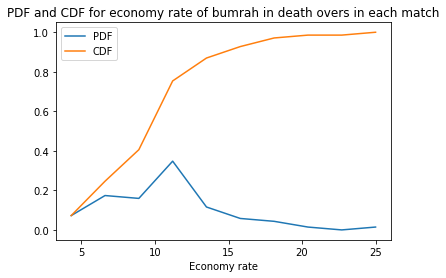

In [30]:
#Now plotting CDF and PDF
import numpy as np
leg = ["PDF", "CDF"]
counts, bin_edges = np.histogram(df_economy_rate_bumrah['economy_rate'], bins=10,density = True)
pdf = counts/(np.sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(leg)
plt.xlabel('Economy rate')
plt.title("PDF and CDF for economy rate of bumrah in death overs in each match")
plt.show();

**Conclusion :-**



*   Probability is ver high when economy rate = 11. From CDF plot i can say that only 30% of the matches his economy is less than 8 in death overs. 
*   So according above analysis i am predicting in today match his economy is greater then 8 in death overs.

